# Workforce Scheduler

### Authors

Sara Carolina Gomez Delgado

Luis Eduardo Robles Jimenez

In [1]:
from data import * 
from genetic_algorithm import genetic_algorithm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def graph(points, lbl = None):
    if lbl is None: plt.scatter(np.arange(len(points)), points)
    else:
        plt.scatter(np.arange(len(points)), points, label = lbl)
        plt.legend()

In [3]:
r = genetic_algorithm(rules, (breaks, areas, inventario, people), 50, 100, pRep = 0.5, pMut = 0.5, dim = (len(people), 7, 0, len(breaks)), debug = False)
r

{'solution': array([[0, 0, 1, 0, 0, 2, 3],
        [0, 0, 1, 0, 0, 2, 3],
        [4, 2, 3, 0, 4, 1, 3],
        [2, 4, 3, 0, 1, 3, 3],
        [2, 4, 3, 0, 1, 3, 3],
        [0, 0, 1, 0, 0, 2, 3],
        [2, 4, 3, 0, 1, 3, 3],
        [0, 0, 1, 0, 0, 2, 3],
        [4, 2, 0, 0, 3, 4, 0],
        [2, 4, 3, 0, 1, 3, 3],
        [0, 4, 0, 0, 0, 0, 2],
        [3, 2, 0, 2, 0, 2, 2],
        [2, 4, 3, 0, 1, 3, 3],
        [0, 2, 3, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 2, 3],
        [0, 0, 1, 0, 0, 2, 3],
        [1, 1, 0, 3, 1, 2, 0],
        [0, 1, 2, 0, 3, 4, 3],
        [0, 2, 3, 0, 1, 1, 1],
        [2, 4, 3, 0, 1, 3, 3]]),
 'fitness': -145849.0,
 'callsToFunction': 5050,
 'bestTracker': [-389662.0,
  -359648.0,
  -359648.0,
  -359648.0,
  -324862.0,
  -324862.0,
  -324862.0,
  -324862.0,
  -324862.0,
  -324862.0,
  -287745.0,
  -287745.0,
  -286739.0,
  -248745.0,
  -248745.0,
  -248745.0,
  -248745.0,
  -206748.0,
  -206748.0,
  -206748.0,
  -206748.0,
  -198739.0,
  -198739.0,
  -

In [4]:
a = rules(r['solution'], breaks, areas, inventario, people, True)
print(a[0])
print("{} errors.".format(len(a[1])))
print(*a[1], sep = '\n')

-145849.0
92 errors.
Persona 0 descansa igual que 1
Persona 0 descansa igual que 1
Persona 0 descansa igual que 1
Persona 0 descansa igual que 2
Persona 0 descansa igual que 3
Persona 0 descansa igual que 4
Persona 1 descansa igual que 0
Persona 1 descansa igual que 0
Persona 1 descansa igual que 0
Persona 1 descansa igual que 2
Persona 1 descansa igual que 3
Persona 1 descansa igual que 4
Persona 2 no tiene un medio dia
Persona 2 descansa igual que 0
Persona 2 descansa igual que 1
Persona 2 descansa igual que 3
Persona 2 descansa igual que 3
Persona 2 descansa igual que 4
Persona 2 descansa igual que 4
Sonia tiene vacaciones y trabaja 5 dias
Persona 3 no tiene un medio dia
Persona 3 descansa igual que 0
Persona 3 descansa igual que 1
Persona 3 descansa igual que 2
Persona 3 descansa igual que 2
Persona 3 descansa igual que 4
Persona 3 descansa igual que 4
Persona 3 descansa igual que 4
Persona 3 descansa igual que 4
Persona 3 descansa igual que 4
Persona 3 descansa igual que 4
Persona

(pR = 0.25, pM = 0.25)	->	-172335.3
(pR = 0.25, pM = 0.5)	->	-193425.8
(pR = 0.25, pM = 0.75)	->	-191499.6
(pR = 0.5, pM = 0.25)	->	-179998.6
(pR = 0.5, pM = 0.5)	->	-188451.4
(pR = 0.5, pM = 0.75)	->	-190249.2
(pR = 0.75, pM = 0.25)	->	-174790.7
(pR = 0.75, pM = 0.5)	->	-181924.5
(pR = 0.75, pM = 0.75)	->	-202796.0


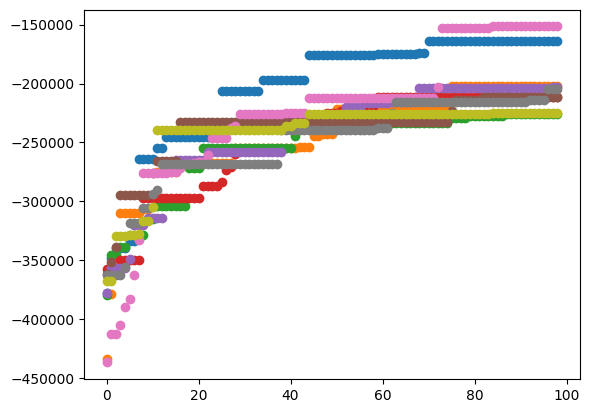

In [5]:
for pR in np.arange(0.25, 1, 0.25):
    for pM in np.arange(0.25, 1, 0.25):
        s, iter = 0, 10
        tracker, best = [], -1e10
        for i in range(iter):
            r = genetic_algorithm(rules, (breaks, areas, inventario, people), 50, 100, pRep = pR, pMut = pM, dim = (len(people), 7, 0, len(breaks)), debug = False)
            s += r['fitness']
            if not i or s > best:
                best = s
                tracker = r['bestTracker']
        graph(tracker)
        print("(pR = {}, pM = {})\t->\t{}".format(pR, pM, s/iter))
    

In [6]:
a = rules(r['solution'], breaks, areas, inventario, people, True)
print(a[0])
print("{} errors.".format(len(a[1])))
print(*a[1][:10], sep = '\n')

-199733.0
70 errors.
Persona 0 no tiene un medio dia
Persona 0 descansa igual que 2
Persona 0 descansa igual que 2
Persona 0 descansa igual que 2
Samanta necesita los sabados
Persona 1 tiene descanso o tarde libre el domingo
Persona 1 entra tarde pero no tiene domingo
Persona 2 trabaja domingo y no entra tarde ningún día
Persona 2 descansa igual que 0
Persona 2 descansa igual que 0


In [7]:
print("Nombre", "LUN", "MAR", "MIER", "JUE", "VIE", "SAB", "DOM", sep = "\t")
for i, p in enumerate(r['solution']):
    print(people[i][:6], end = '\t')
    for j, d in enumerate(p):
        print(codigos[d], end = '\t')
    print()

Nombre	LUN	MAR	MIER	JUE	VIE	SAB	DOM
Samant	C	T	M	C	D	C	M	
Luz	M	D	C	C	C	C	M	
Sonia	C	M	M	M	D	C	M	
Laura	D	C	M	C	C	C	C	
Maira	C	M	C	D	C	C	T	
Gloria	M	M	M	T	D	M	C	
Fernan	D	C	M	C	C	C	C	
Mariso	M	D	C	C	C	C	M	
Susy	M	M	M	T	D	M	C	
Diana	D	C	M	C	C	C	C	
Brayan	M	D	C	C	C	C	M	
Nallel	M	D	C	C	C	C	M	
Marlet	C	T	M	C	D	C	M	
Lucia	D	C	M	C	C	C	C	
Fabian	M	D	C	C	C	C	M	
Albert	D	C	M	C	C	C	C	
Elena	M	D	C	C	M	M	M	
Nancy	M	C	D	M	M	T	C	
Andrea	M	C	D	C	C	M	C	
Alma	M	M	M	T	D	M	C	
